<a href="https://colab.research.google.com/drive/1K7kYhTSpYVvsgXYF1DMVt1MIVLEM0oj6" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## $\color{Blue} {\text{Question 1}}$

$$
A = \begin{bmatrix}
1/2 & 1/2  \\ 
1/2 & 1/2 
\end{bmatrix} \quad \quad \quad \quad 
B = \begin{bmatrix}
1 & 0  \\ 
0 & -1 
\end{bmatrix} \quad \quad \quad \quad 
C = A B
$$

Taking the power of a matrix is an important operation with applications in statistics, machine learning, and engineering. For example, solving linear ordinary differential equations, identifying the state of a Markov chain at time $t$, or identifying the number of paths between nodes in a graph can all be solved using the powers of matrices. In this quick post, we’ll show how Matrix Diagonalization can be used to efficiently compute the power of a matrix.

If matrix $M$ is an $m\times m$ diagonalizable, then $M^k$ can be calculated directly from the diagonalization $M = PDP^{-1}$ where $P$ are the eigenvectors and $D$ is the vector of the eignvalues, as follows:

\begin{align}
M^k & = M \times M \times \cdots \times M \\
& = (PDP^{-1}) (PDP^{-1}) \cdots (PDP^{-1})\\
& = PD (P^{-1} P) D (P^{-1} P) \cdots DP^{-1} \\
& = P D^k P^{-1}
\end{align}


Therefore to calculate $M^k$, we simply need to diagonalize $M$ and re-matrix-multiply the diagonalization components after raising the diagonal matrix component $D$ to the $k$-th power. This trick allows us to calculate the matrix power by multiplying three matrices, rather than $k$. Thus as 
$k$ gets large, or the size of the matrix $M$ grows, you get more and more gains in efficiency.

In [78]:
#Define the matrix
A = [[1/2 , 1/2],[1/2 , 1/2]]

#Diagonalize A via Eigenvalue Decomposition: Find both the eigenvalues and eigenvectors
D1,V1 = np.linalg.eig(A) #D1 for eigenvalues and V1 for eigenvectors
#print both eigenvalues and eigenvectors
print('E-value:', D1)
print('E-vector', V1)
# Put eigenvalues into a diagonal matrix
D1 = np.diag(D1)  

#Define the power you want to raise the matrix to
n1= 37

#Calculate the matrix raised to the power n 
AA = V1 @ D1 ** n1 @ np.linalg.inv(V1)
#print it
print('The matrix A raised to the power n is: \n', AA)
#OR
#AA = np.linalg.matrix_power(A, n1)
#print it
#print('The matrix A raised to the power n is: \n', AA)

E-value: [1.00000000e+00 1.11022302e-16]
E-vector [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
The matrix A raised to the power n is: 
 [[0.5 0.5]
 [0.5 0.5]]


In [80]:
#Define the matrix
B = [[1 ,0],[0 , -1]]

#Diagonalize A via Eigenvalue Decomposition: Find both the eigenvalues and eigenvectors
D2,V2 = np.linalg.eig(B) #D2 for eigenvalues and V2 for eigenvectors
#print both eigenvalues and eigenvectors
print('E-value:', D2)
print('E-vector', V2)
# Put eigenvalues into a diagonal matrix
D2 = np.diag(D2)  

#Define the power you want to raise the matrix to
n2 = 138

#Calculate the matrix raised to the power n 
BB = V2 @ D2 ** n2 @ np.linalg.inv(V2)
#print it
print('The matrix B raised to the power n is: \n', BB)
#OR
#BB = np.linalg.matrix_power(B, n2)
#print it
#print('The matrix B raised to the power n is: \n', BB)

E-value: [ 1. -1.]
E-vector [[1. 0.]
 [0. 1.]]
The matrix B raised to the power n is: 
 [[1. 0.]
 [0. 1.]]


In [90]:
#Define the matrix
C = np.dot(A,B)

#Diagonalize A via Eigenvalue Decomposition: Find both the eigenvalues and eigenvectors
D3,V3 = np.linalg.eig(C) #D2 for eigenvalues and V2 for eigenvectors
#print both eigenvalues and eigenvectors
print('E-value:', D3)
print('E-vector', V3)
# Put eigenvalues into a diagonal matrix
D3 = np.diag(D3)  

#Define the power you want to raise the matrix to
n3 = 42

#Calculate the matrix raised to the power n 
#CC = np.real(V3 @ D3 ** n3 @ np.linalg.inv(V3))
#print it
#print('The matrix C raised to the power n is: \n', CC)
#OR
CC = np.linalg.matrix_power(C, n3)
#print it
print('The matrix C raised to the power n is: \n', CC)

E-value: [5.04378831e-17+7.85046229e-17j 5.04378831e-17-7.85046229e-17j]
E-vector [[0.70710678+1.11022302e-16j 0.70710678-1.11022302e-16j]
 [0.70710678+0.00000000e+00j 0.70710678-0.00000000e+00j]]
The matrix C raised to the power n is: 
 [[0. 0.]
 [0. 0.]]


## $\color{Blue} {\text{Question 2}}$

$$
A = \begin{bmatrix}
1 & 1/3  \\ 
c & d 
\end{bmatrix}
$$

We need to find both $c$ and $d$ so that:

$$
A^2 = - I
$$

where $I$ is the unitary matrix. Let's write:

\begin{align}
A^2 & = \begin{bmatrix}
1 & 1/3  \\ 
c & d 
\end{bmatrix} \begin{bmatrix}
1 & 1/3  \\ 
c & d 
\end{bmatrix} \\
& = \begin{bmatrix}
1+(1/3)c & 1/3+(1/3)d  \\ 
c+dc & (1/3)c+d^2
\end{bmatrix} = -\begin{bmatrix}
1 & 0  \\ 
0 & 1 
\end{bmatrix} \\
\end{align}

From this, we can write four equations with two unknowns:

\begin{align}
& 1 + \frac{1}{3}c = -1\\
& \frac{1}{3} +\frac{1}{3} d = 0\\
& c + dc = 0 \\
& \frac{1}{3}c + d^2 = -1
\end{align}

This can be easily solved and the values for both unknowns can be computed as:

$$
c =-\frac{2}{3} \quad \quad \quad d = -1 
$$

## $\color{Blue} {\text{Question 3}}$

In [6]:
#Define A matrix
A = np.array([[100 , 3 , -2 ],[1 , 200 , 5],[-4 , 3 , 100]])

#define the righ-hand side vector
b = np.array([800, 1000, 500])

### Direct Solution Method

In [8]:
#Take the inverse
A_inv = np.linalg.inv(A)

#solve the system
x = np.dot(A_inv,b) #method 1
#x = A_inv @ b #method 2
print('the solution of the linear system of equations is x=:' , x)

the solution of the linear system of equations is x=: [7.95854215 4.8308719  5.17341553]


### Iterative solution Method

7.958542163872832 4.830871898170764 5.17341552960979


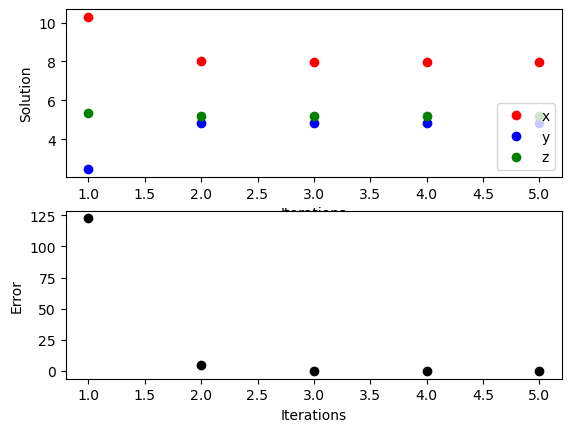

In [11]:
#Gauss-Seide Method

#Define initial guess for the three variables
x0=-5
y0=-10
z0=100

# Setting error to move into the while loop
error=1

# Setting up iteration counter
count=0

while error>1.E-5:
    count+=1
    
    #Evaluating new values based on old guess
    x = (800-3*y0+2*z0)/100
    y = (1000-5*z0-x)/200
    z = (500+4*x-3*y)/100

    #plot the solution
    plt.subplot(2,1,1)
    plt.plot(count,x,'ro',count,y,'bo',count,z,'go') 
    plt.xlabel('Iterations')
    plt.ylabel('Solution')
    plt.legend(['x','y','z'], loc='lower right')
    #plt.ylim((-5,15))
    
    # Error evaluation
    error = abs(x-x0)+abs(y-y0)+abs(z-z0)
    #plot the Error
    plt.subplot(2,1,2)
    plt.plot(count,error,'ko')
    plt.xlabel('Iterations')
    plt.ylabel('Error')

    # Updating the Guess for next iteration.
    x0=x
    y0=y
    z0=z
           
print(x,y,z)

## $\color{Blue} {\text{Question 4}}$

(-9.446750028454214e-49, -9.4467500284542e-49)

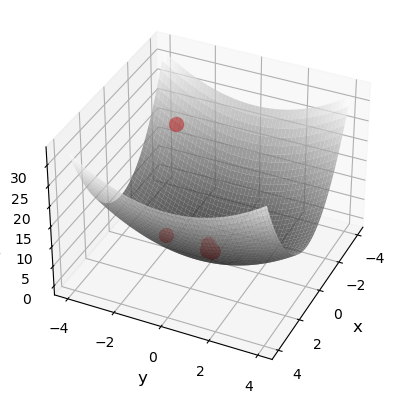

In [66]:
#Gradient Decent

#Define the xy dimesnions
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)

#build an xy mesh
X, Y = np.meshgrid(x, y)

#define the quadratic form of the Ax=b linear system of equation, i.e., the
#surface that defines it. 
f = (3/2)*X**2+(1/2)*Y**2

#show the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,f,cmap='gray', alpha=0.7)

#suggest random initial values for both variables
x0 = -3
y0 = -3

#calculate the initial funciton, i.e., the point that corresponds to the
#random initial point
f0 =  (3/2)*x0**2+(1/2)*y0**2;

#plot the first random point on the surface
ax.scatter(x0,y0,f0, s=100, color='red')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('f(x,y)', fontsize=12)

# Adjust the viewing perspective if needed
ax.view_init(elev=35, azim=25)

#iterate until the minimum of the surface is reached 
#or the convergence threshold is achieved.
Num_steps = 100
    
for i in range(Num_steps):
    #define the step size
    tau = (9*x0**2+y0**2)/(27*x0**2+y0**2)
    
    #calculate future steps
    xnew = (1-3*tau)*x0
    ynew = (1-tau)*y0
    fnew =  (3/2)*xnew**2+(1/2)*ynew**2;
    
    #show the iterated point on the 3D plot
    ax.scatter(xnew,ynew,fnew, s=100, color='red')
    
    #update the x,y values for the next iteration
    x0 = xnew
    y0 = ynew
    
    #%if the tolerance between each points exit the iteration cycle.
    if abs(fnew-f0)<1.E-8:
        break
    
x0,y0

## $\color{Blue} {\text{Question 5}}$

### 1. For her calculus class, Marie has scored $88$, $78$, and $95$ on three of her tests so far. What is the minimum score Marie needs to receive on her $4$th test to have an average of $90$?

To find the average of a set of numbers, add up the individual values and divide by the total number of values you have. For the test scores, we can set up the following equation with $x$ being the score on the fourth test:

$$
\frac{88+78+95+x}{4} = 90
$$

Now, solve for $x$:
$$
88+78+95+x = 360 \Longrightarrow 261 + x = 360 \Longrightarrow x = 99
$$

### 2. A student’s grades on five tests are $70$, $75$, $80$, $85$, and $90$. If the final exam, worth two test grades, is $85$, what is the student’s average grade?

First, calculate the total of the five test grades and the final exam (counted twice).
$$
\text{Total grades} = 70 + 75 + 80 + 85 + 90 + 85 + 85.
$$

$$
\text{Total} = 570.
$$

Divide the total by the number of tests ($7$, since the final counts as two).
    
$$
\text{Average} = 570 / 7 = 95.
$$

### 3. In a survey, 40 people were asked about the number of books they read in a month. The results are as follows: $1, 0, 2, 3, 1, 4, 2, 1, 0, 2, 1, 5, 1, 1, 3, 2, 0, 1, 4, 1, 2, 1, 3, 1, 0, 2, 4, 1, 2, 0, 1, 1, 3, 2, 1, 4, 1, 2, 1,$ and $0$. Calculate the mode of the data.

The mode is the value that appears most frequently. In this data, the number $1$ appears most frequently. Therefore, the mode of this data is $1$ book.

### 4. The mean of a data set is $50$, and its standard deviation is $5$. Using the empirical rule, what percentage of the data falls between $45$ and $55$?

According to the empirical rule ($68-95-99.7$ rule), approximately $68\%$ of the data in a normal distribution falls within one standard deviation of the mean. Since $45$ and $55$ are one standard deviation away from the mean $(50)$, approximately $68\%$ of the data falls between $45$ and $55$.

<img src="EmpiricalRule.JPG" width="500" height="500" align="center"/>